In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from scipy.signal import welch, spectrogram

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
#CREAMOS NUESTRA SEÑAL A ELECCION

def generate_custom_signal(w, t):
    """
    Generate a custom signal based on the given equation:
    cos(wt) - (1/3)sin(wt) + (1/5)cos(5wt)

    Parameters:
    w (float): Angular frequency
    t (np.ndarray): Time array

    Returns:
    np.ndarray: Generated signal
    """
    signal = np.cos(w * t) - (1/3) * np.sin(w * t) + (1/5) * np.cos(5 * w * t)
    return signal

# Example usage:
fs = 1000  # Sampling frequency (samples per second)
T = 1      # Duration in seconds
w = 2 * np.pi * 10  # Angular frequency (10 Hz)
t = np.linspace(0, T, int(fs * T), endpoint=False)  # Time array

signal = generate_custom_signal(w, t)

<ipython-input-4-57007be1bcbc>:37: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies[:N//2], magnitude[:N//2], use_line_collection=True)


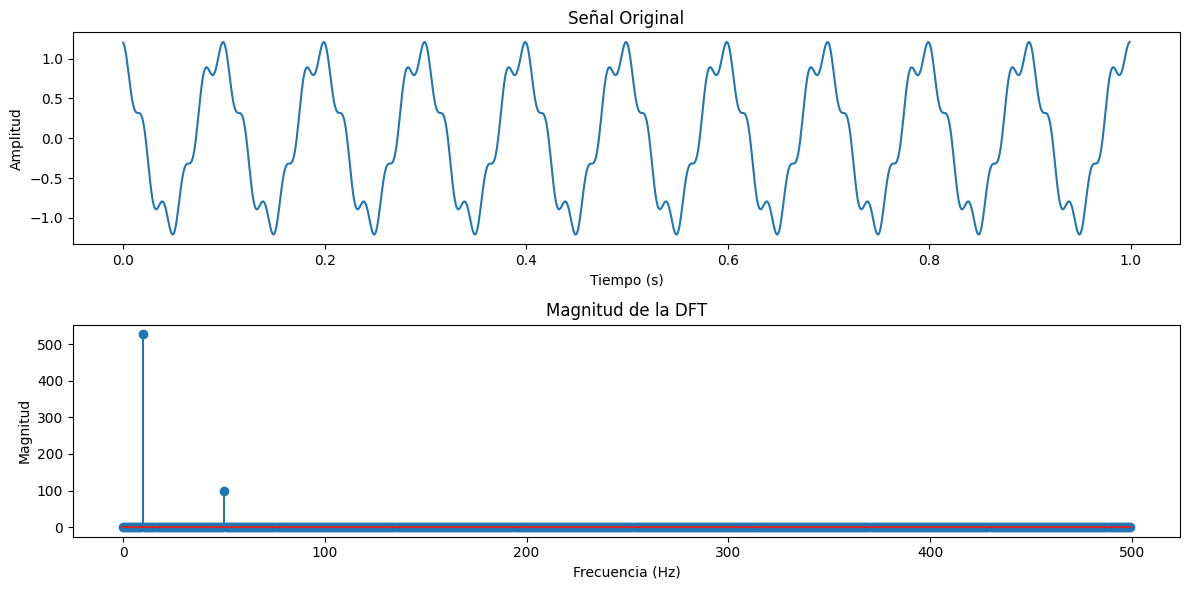

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función para generar la señal
def generate_custom_signal(w, t):
    signal = np.cos(w * t) - (1/3) * np.sin(w * t) + (1/5) * np.cos(5 * w * t)
    return signal

# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo (muestras por segundo)
T = 1      # Duración en segundos
w = 2 * np.pi * 10  # Frecuencia angular (10 Hz)
t = np.linspace(0, T, int(fs * T), endpoint=False)  # Array de tiempo

# Generar la señal
signal = generate_custom_signal(w, t)

# Calcular la DFT usando la Transformada Rápida de Fourier (FFT)
N = len(signal)
X = np.fft.fft(signal)
frequencies = np.fft.fftfreq(N, 1/fs)

# Magnitud de la DFT
magnitude = np.abs(X)

# Graficar la señal original
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Señal Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Graficar la magnitud de la DFT
plt.subplot(2, 1, 2)
plt.stem(frequencies[:N//2], magnitude[:N//2], use_line_collection=True)
plt.title('Magnitud de la DFT')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')

plt.tight_layout()
plt.show()

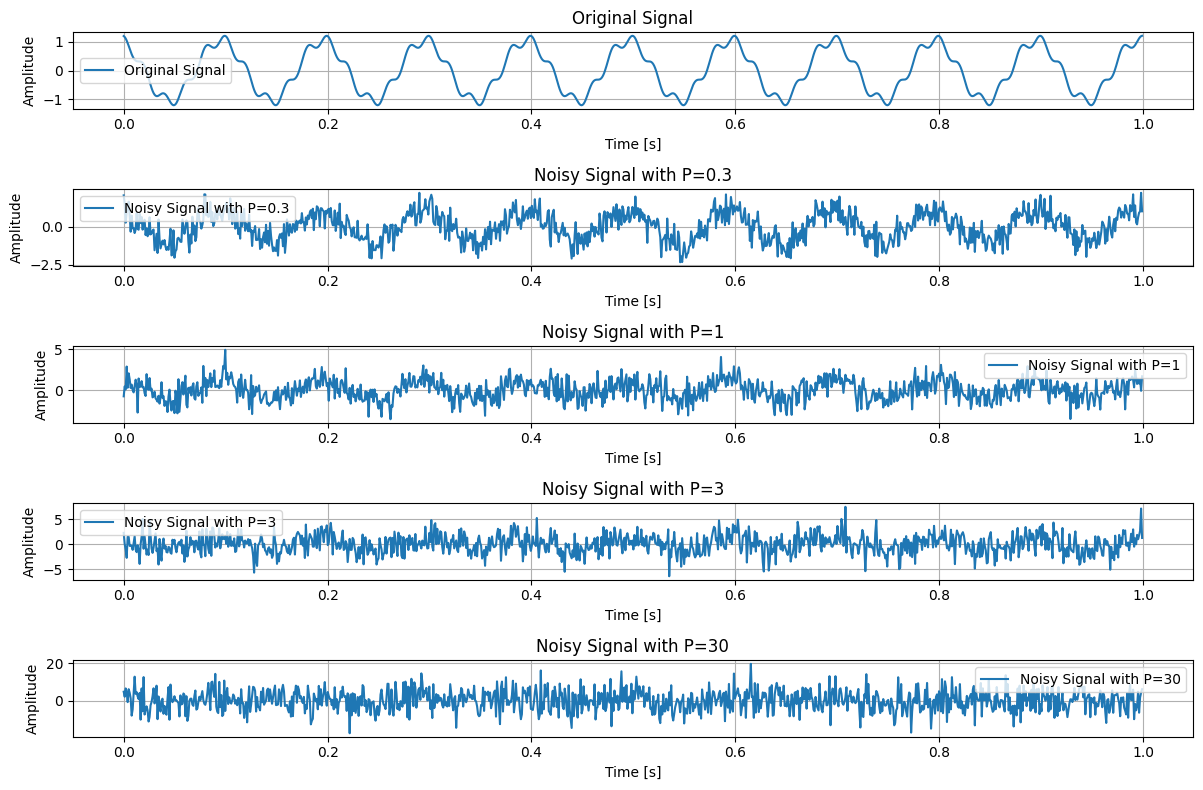

In [ ]:

# Define la función para añadir ruido gaussiano
def add_gaussian_noise(signal, variance):
    """
    Add Gaussian noise to the signal.

    Parameters:
    signal (np.ndarray): Original signal
    variance (float): Variance of the Gaussian noise

    Returns:
    np.ndarray: Noisy signal
    """
    noise = np.random.normal(loc=0.0, scale=np.sqrt(variance), size=signal.shape)
    noisy_signal = signal + noise
    return noisy_signal

# Parámetros
fs = 1024  # Frecuencia de muestreo (samples per second)
T = 1      # Duración en segundos
w = 2 * np.pi * 10  # Frecuencia angular (10 Hz)
t = np.linspace(0, T, fs, endpoint=False)  # Array de tiempo

# Genera la señal original
signal = generate_custom_signal(w, t)

# Varianza de ruido
variances = [0.3, 1, 3, 30]

# Número de realizaciones
M = 512

# Crear matrices para almacenar las señales con ruido
noisy_signals_matrices = {f'P_{P}': np.zeros((fs, M)) for P in variances}

# Generar y almacenar las señales con ruido
for variance in variances:
    for i in range(M):
        noisy_signal = add_gaussian_noise(signal, variance)
        noisy_signals_matrices[f'P_{variance}'][:, i] = noisy_signal

# Guardar la señal original
np.save('original_signal.npy', signal)

# Graficar una muestra de las señales con ruido
plt.figure(figsize=(12, 8))
plt.subplot(5, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

for i, variance in enumerate(variances, start=2):
    plt.subplot(5, 1, i)
    plt.plot(t, noisy_signals_matrices[f'P_{variance}'][:, 0], label=f'Noisy Signal with P={variance}')
    plt.title(f'Noisy Signal with P={variance}')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()

plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

In [ ]:
pip install scikit-learn

Error Cuadrático Medio (MSE) para diferentes niveles de ruido:
Varianza 0.3: MSE = 0.87691
Varianza 1: MSE = 1.58004
Varianza 3: MSE = 3.57527
Varianza 30: MSE = 30.63937


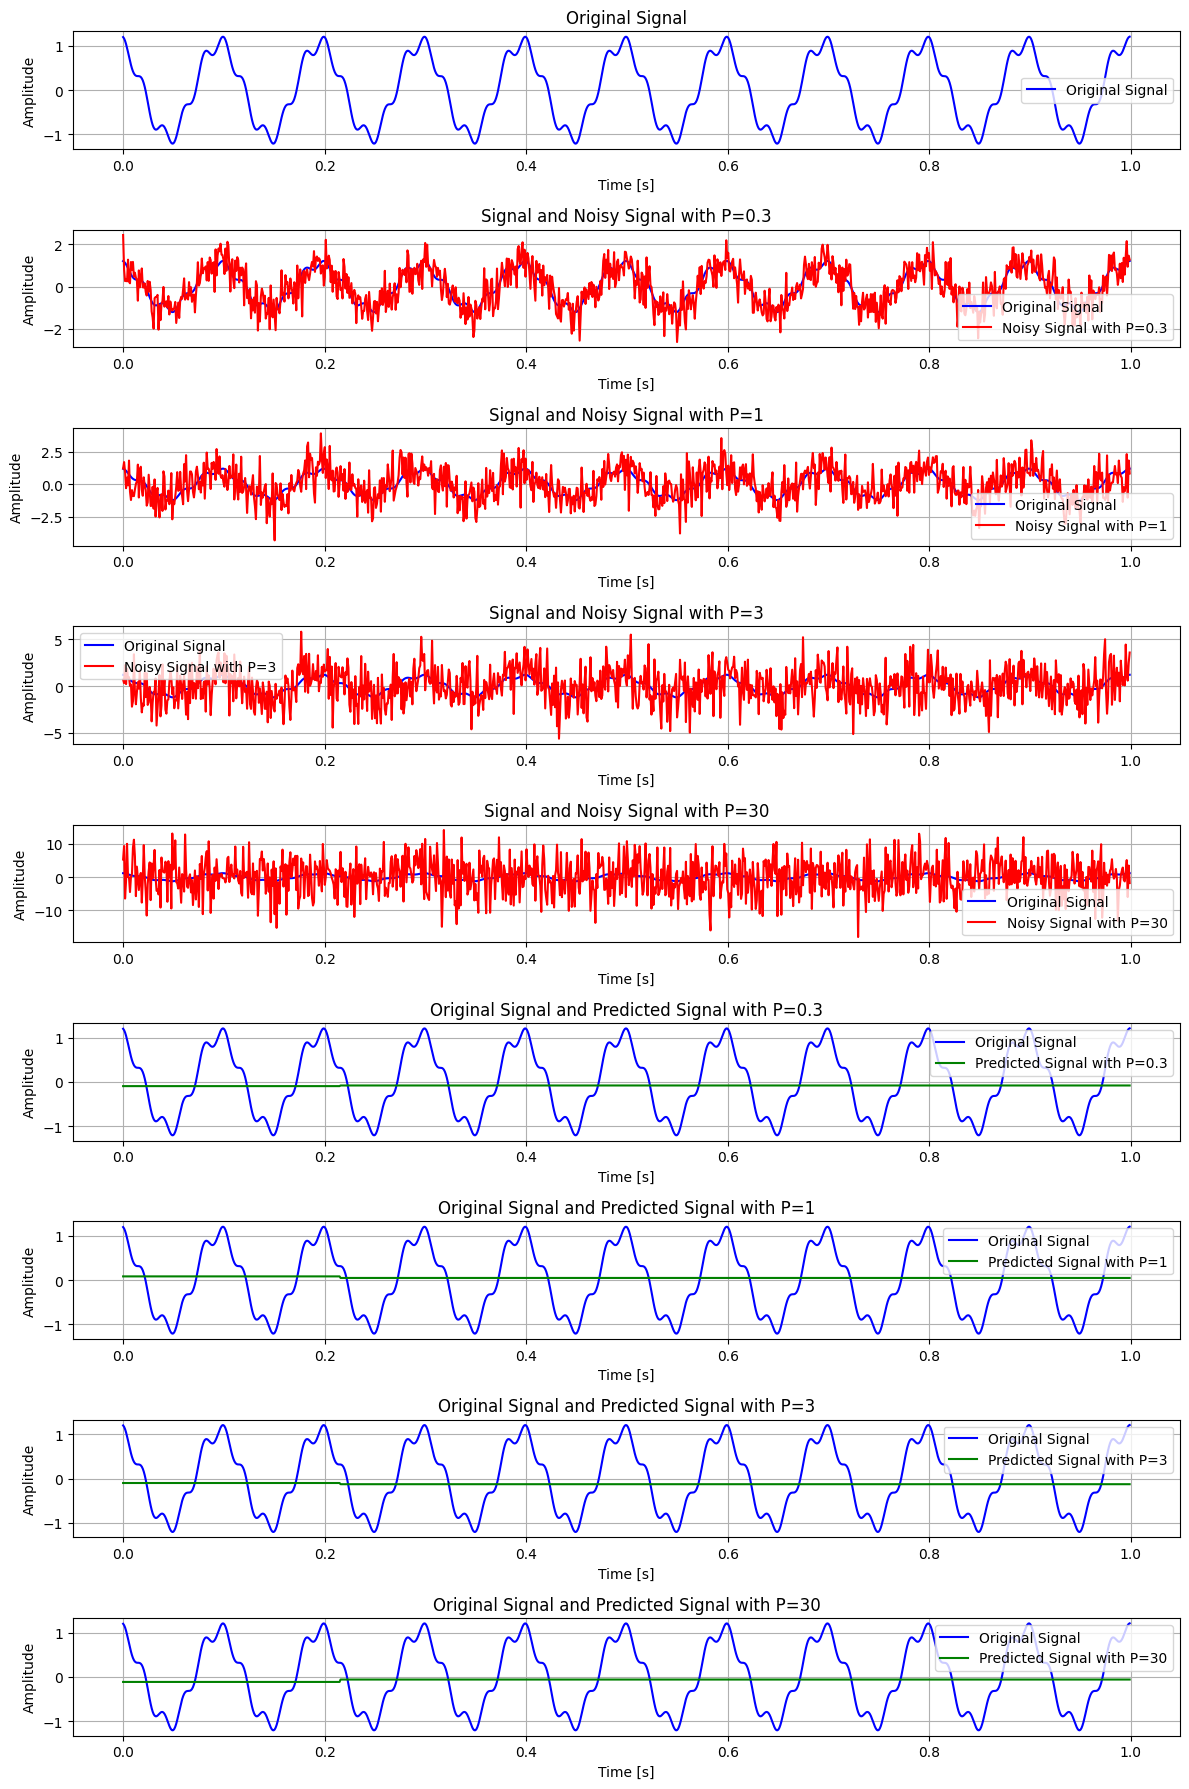

In [ ]:
# Mostrar los resultados
print("Error Cuadrático Medio (MSE) para diferentes niveles de ruido:")
for variance, mse in results.items():
    print(f"Varianza {variance}: MSE = {mse:.5f}")

# Graficar un ejemplo de señales ruidosas, señales originales y predicciones del modelo MLP
num_variances = len(variances)
fig, axes = plt.subplots(nrows=num_variances * 2 + 1, ncols=1, figsize=(12, 2 * (num_variances * 2 + 1)))

# Plot for the original signal
axes[0].plot(t, signal, label='Original Signal', color='blue')
axes[0].set_title('Original Signal')
axes[0].set_xlabel('Time [s]')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)
axes[0].legend()

# Plot for each noisy signal and its prediction
for i, variance in enumerate(variances):
    axes[i + 1].plot(t, signal, label='Original Signal', color='blue')
    axes[i + 1].plot(t, noisy_signals_matrices[f'P_{variance}'][:, 0], label=f'Noisy Signal with P={variance}', color='red')
    axes[i + 1].set_title(f'Signal and Noisy Signal with P={variance}')
    axes[i + 1].set_xlabel('Time [s]')
    axes[i + 1].set_ylabel('Amplitude')
    axes[i + 1].grid(True)
    axes[i + 1].legend()

    axes[num_variances + i + 1].plot(t, signal, label='Original Signal', color='blue')
    axes[num_variances + i + 1].plot(t, predicted_signals_matrices[f'P_{variance}'][:, 0], label=f'Predicted Signal with P={variance}', color='green')
    axes[num_variances + i + 1].set_title(f'Original Signal and Predicted Signal with P={variance}')
    axes[num_variances + i + 1].set_xlabel('Time [s]')
    axes[num_variances + i + 1].set_ylabel('Amplitude')
    axes[num_variances + i + 1].grid(True)
    axes[num_variances + i + 1].legend()

plt.tight_layout()
plt.show()

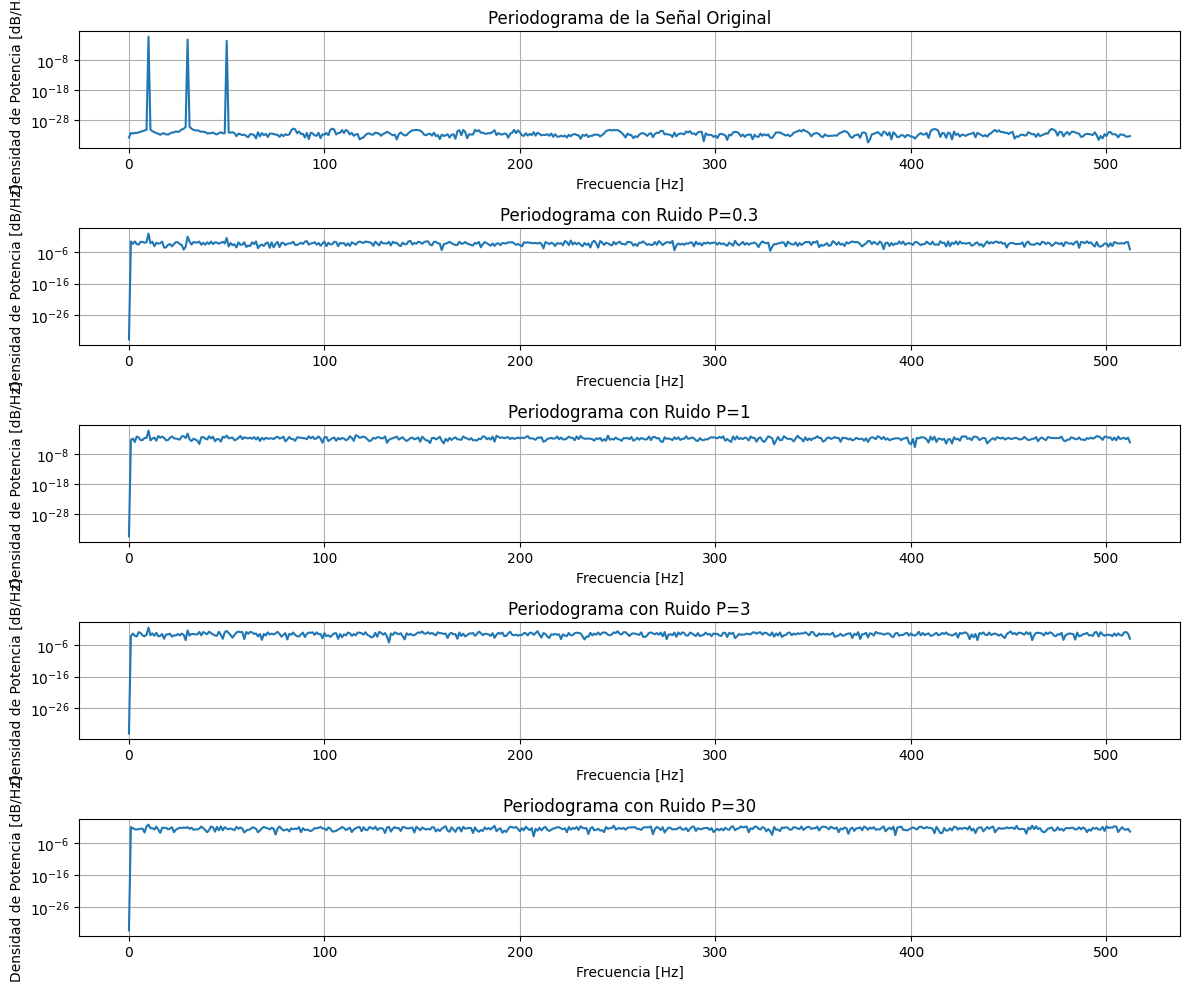

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Definir la función para generar la señal
def generate_custom_signal(w, t):
    """
    Generate a custom signal based on the given equation:
    cos(wt) - (1/3)sin(wt) + (1/5)cos(5wt)

    Parameters:
    w (float): Angular frequency
    t (np.ndarray): Time array

    Returns:
    np.ndarray: Generated signal
    """
    signal = np.cos(w * t) - (1/3) * np.sin(3 * w * t) + (1/5) * np.cos(5 * w * t)
    return signal

# Definir la función para añadir ruido gaussiano
def add_gaussian_noise(signal, variance):
    """
    Add Gaussian noise to the signal.

    Parameters:
    signal (np.ndarray): Original signal
    variance (float): Variance of the Gaussian noise

    Returns:
    np.ndarray: Noisy signal
    """
    noise = np.random.normal(loc=0.0, scale=np.sqrt(variance), size=signal.shape)
    noisy_signal = signal + noise
    return noisy_signal

# Parámetros
fs = 1024  # Frecuencia de muestreo (samples per second)
T = 1      # Duración en segundos
w = 2 * np.pi * 10  # Frecuencia angular (10 Hz)
t = np.linspace(0, T, fs, endpoint=False)  # Array de tiempo

# Generar la señal original
signal = generate_custom_signal(w, t)

# Varianza de ruido
variances = [0.3, 1, 3, 30]

# Graficar el periodograma para la señal original
plt.figure(figsize=(12, 10))

# Periodograma de la señal original
f, Pxx = periodogram(signal, fs)
plt.subplot(len(variances) + 1, 1, 1)
plt.semilogy(f, Pxx)
plt.title('Periodograma de la Señal Original')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad de Potencia [dB/Hz]')
plt.grid(True)

# Periodograma para las señales ruidosas
for i, variance in enumerate(variances, start=2):
    noisy_signal = add_gaussian_noise(signal, variance)
    f, Pxx = periodogram(noisy_signal, fs)

    plt.subplot(len(variances) + 1, 1, i)
    plt.semilogy(f, Pxx)
    plt.title(f'Periodograma con Ruido P={variance}')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Densidad de Potencia [dB/Hz]')
    plt.grid(True)

plt.tight_layout()  # Ajustar el diseño para evitar el solapamiento
plt.show()

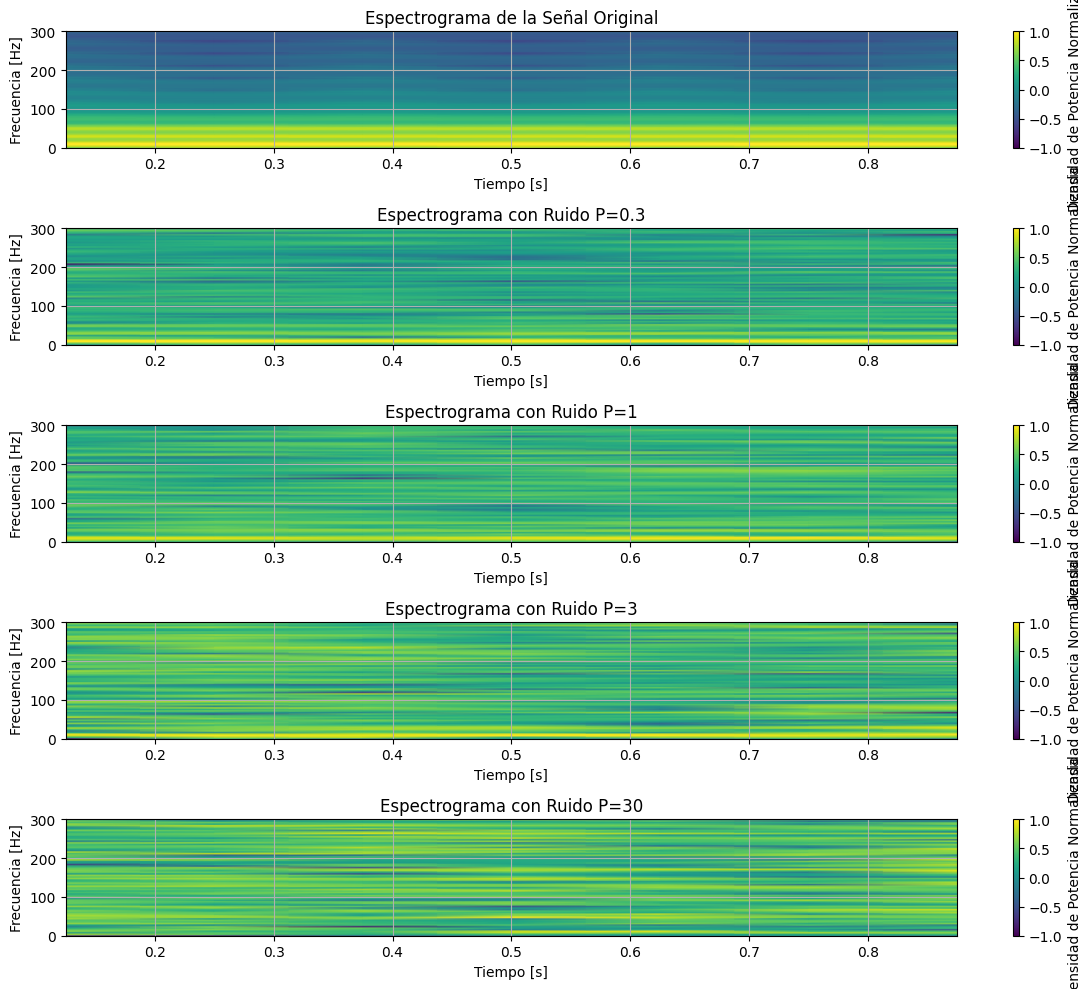

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Definir la función para generar la señal
def generate_custom_signal(w, t):
    """
    Generate a custom signal based on the given equation:
    cos(wt) - (1/3)sin(wt) + (1/5)cos(5wt)

    Parameters:
    w (float): Angular frequency
    t (np.ndarray): Time array

    Returns:
    np.ndarray: Generated signal
    """
    signal = np.cos(w * t) - (1/3) * np.sin(3 * w * t) + (1/5) * np.cos(5 * w * t)
    return signal

# Definir la función para añadir ruido gaussiano
def add_gaussian_noise(signal, variance):
    """
    Add Gaussian noise to the signal.

    Parameters:
    signal (np.ndarray): Original signal
    variance (float): Variance of the Gaussian noise

    Returns:
    np.ndarray: Noisy signal
    """
    noise = np.random.normal(loc=0.0, scale=np.sqrt(variance), size=signal.shape)
    noisy_signal = signal + noise
    return noisy_signal

# Parámetros
fs = 1024  # Frecuencia de muestreo (samples per second)
T = 1      # Duración en segundos
w = 2 * np.pi * 10  # Frecuencia angular (10 Hz)
t = np.linspace(0, T, fs, endpoint=False)  # Array de tiempo

# Generar la señal original
signal = generate_custom_signal(w, t)

# Varianza de ruido
variances = [0.3, 1, 3, 30]

# Graficar el espectrograma logarítmico para la señal original y señales con ruido
plt.figure(figsize=(12, 10))

# Función para normalizar la densidad de potencia
def normalize_power_spectrum(Sxx):
    Sxx_db = 10 * np.log10(Sxx + np.finfo(float).eps)  # Convertir a decibelios con un pequeño valor para evitar log(0)
    min_Sxx_db = np.min(Sxx_db)
    max_Sxx_db = np.max(Sxx_db)
    return 2 * (Sxx_db - min_Sxx_db) / (max_Sxx_db - min_Sxx_db) - 1

# Espectrograma de la señal original
f, t_spec, Sxx = spectrogram(signal, fs, nperseg=256, noverlap=128)
Sxx_normalized = normalize_power_spectrum(Sxx)
plt.subplot(len(variances) + 1, 1, 1)
plt.pcolormesh(t_spec, f, Sxx_normalized, shading='gouraud', cmap='viridis')
plt.colorbar(label='Densidad de Potencia Normalizada')
plt.title('Espectrograma de la Señal Original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.ylim(0, 300)  # Limitar el rango de frecuencias a 0-100 Hz
plt.grid(True)

# Espectrograma para las señales ruidosas
for i, variance in enumerate(variances, start=2):
    noisy_signal = add_gaussian_noise(signal, variance)
    f, t_spec, Sxx = spectrogram(noisy_signal, fs, nperseg=256, noverlap=128)
    Sxx_normalized = normalize_power_spectrum(Sxx)

    plt.subplot(len(variances) + 1, 1, i)
    plt.pcolormesh(t_spec, f, Sxx_normalized, shading='gouraud', cmap='viridis')
    plt.colorbar(label='Densidad de Potencia Normalizada')
    plt.title(f'Espectrograma con Ruido P={variance}')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Frecuencia [Hz]')
    plt.ylim(0, 300)  # Limitar el rango de frecuencias a 0-100 Hz
    plt.grid(True)

plt.tight_layout()  # Ajustar el diseño para evitar el solapamiento
plt.show()


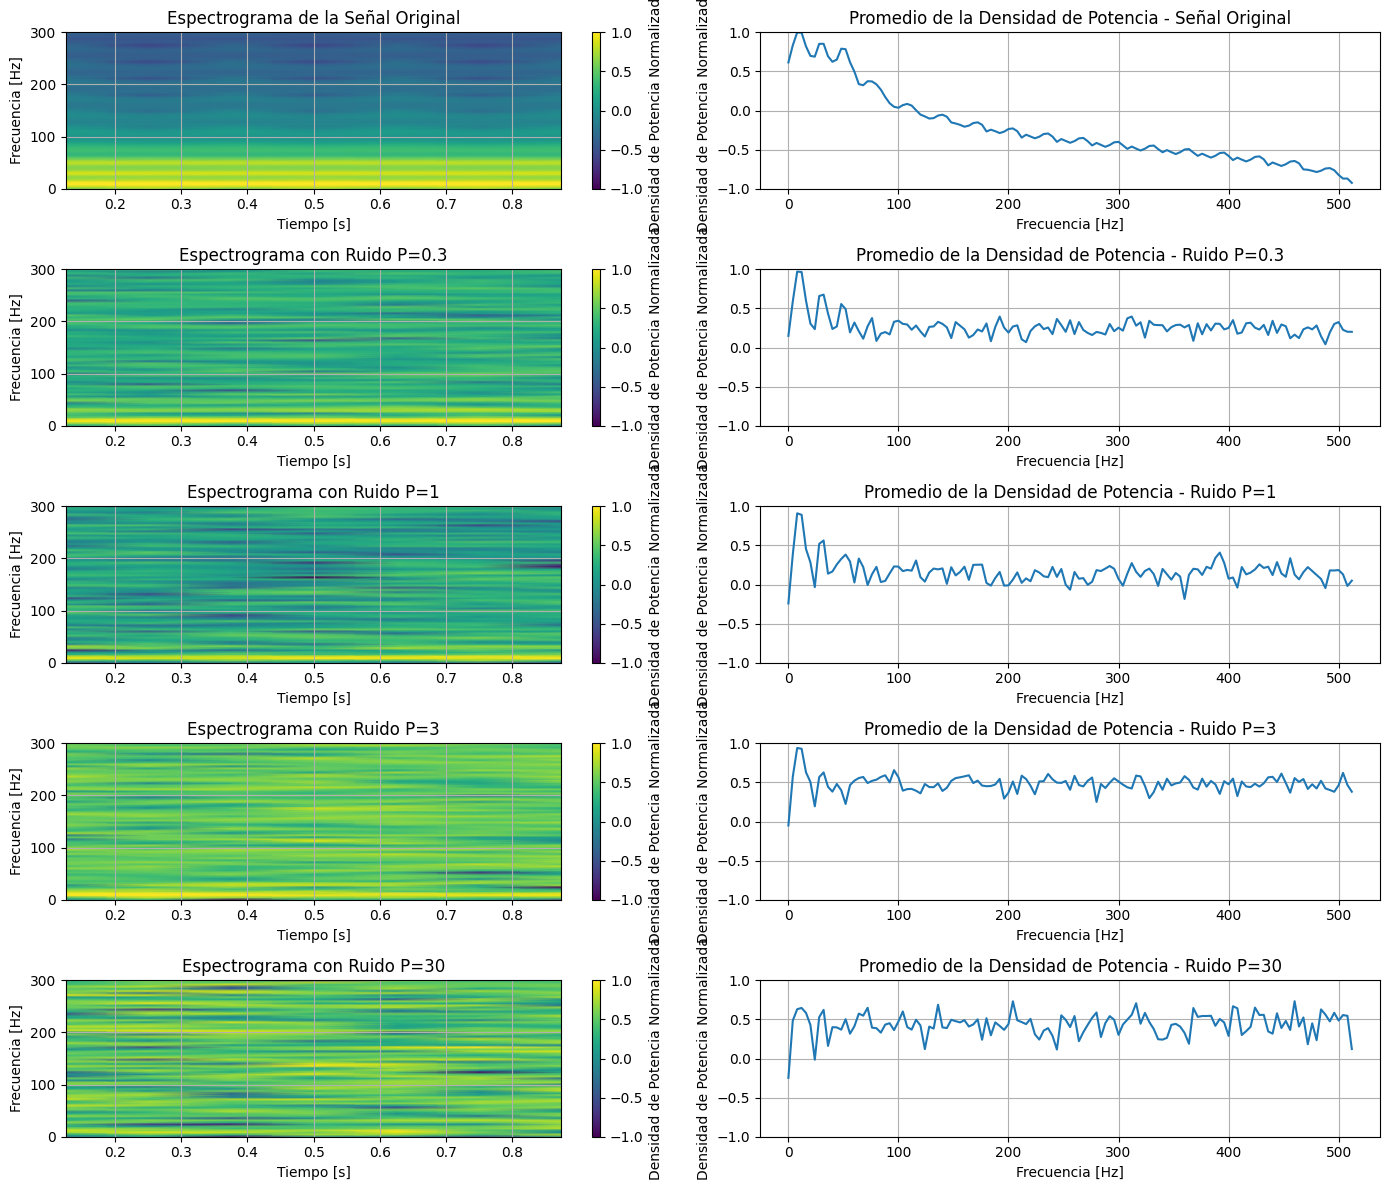

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Definir la función para generar la señal
def generate_custom_signal(w, t):
    signal = np.cos(w * t) - (1/3) * np.sin(3 * w * t) + (1/5) * np.cos(5 * w * t)
    return signal

# Definir la función para añadir ruido gaussiano
def add_gaussian_noise(signal, variance):
    noise = np.random.normal(loc=0.0, scale=np.sqrt(variance), size=signal.shape)
    noisy_signal = signal + noise
    return noisy_signal

# Parámetros
fs = 1024  # Frecuencia de muestreo (samples per second)
T = 1      # Duración en segundos
w = 2 * np.pi * 10  # Frecuencia angular (10 Hz)
t = np.linspace(0, T, fs, endpoint=False)  # Array de tiempo

# Generar la señal original
signal = generate_custom_signal(w, t)

# Varianza de ruido
variances = [0.3, 1, 3, 30]

# Graficar el espectrograma logarítmico para la señal original y señales con ruido
plt.figure(figsize=(14, 12))

# Función para normalizar la densidad de potencia
def normalize_power_spectrum(Sxx):
    Sxx_db = 10 * np.log10(Sxx + np.finfo(float).eps)  # Convertir a decibelios con un pequeño valor para evitar log(0)
    min_Sxx_db = np.min(Sxx_db)
    max_Sxx_db = np.max(Sxx_db)
    return 2 * (Sxx_db - min_Sxx_db) / (max_Sxx_db - min_Sxx_db) - 1

# Espectrograma de la señal original
f, t_spec, Sxx = spectrogram(signal, fs, nperseg=256, noverlap=128)
Sxx_normalized = normalize_power_spectrum(Sxx)
plt.subplot(len(variances) + 1, 2, 1)
plt.pcolormesh(t_spec, f, Sxx_normalized, shading='gouraud', cmap='viridis')
plt.colorbar(label='Densidad de Potencia Normalizada')
plt.title('Espectrograma de la Señal Original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.ylim(0, 300)  # Limitar el rango de frecuencias a 0-300 Hz
plt.grid(True)

# Promedio punto a punto del eje Y
mean_Sxx = np.mean(Sxx_normalized, axis=1)
plt.subplot(len(variances) + 1, 2, 2)
plt.plot(f, mean_Sxx, label='Promedio del espectro')
plt.title('Promedio de la Densidad de Potencia - Señal Original')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad de Potencia Normalizada')
plt.ylim(-1, 1)
plt.grid(True)

# Espectrograma para las señales ruidosas
for i, variance in enumerate(variances, start=2):
    noisy_signal = add_gaussian_noise(signal, variance)
    f, t_spec, Sxx = spectrogram(noisy_signal, fs, nperseg=256, noverlap=128)
    Sxx_normalized = normalize_power_spectrum(Sxx)

    plt.subplot(len(variances) + 1, 2, 2*i - 1)
    plt.pcolormesh(t_spec, f, Sxx_normalized, shading='gouraud', cmap='viridis')
    plt.colorbar(label='Densidad de Potencia Normalizada')
    plt.title(f'Espectrograma con Ruido P={variance}')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Frecuencia [Hz]')
    plt.ylim(0, 300)  # Limitar el rango de frecuencias a 0-300 Hz
    plt.grid(True)

    # Promedio punto a punto del eje Y para la señal con ruido
    mean_Sxx = np.mean(Sxx_normalized, axis=1)
    plt.subplot(len(variances) + 1, 2, 2*i)
    plt.plot(f, mean_Sxx, label=f'Promedio del espectro - P={variance}')
    plt.title(f'Promedio de la Densidad de Potencia - Ruido P={variance}')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Densidad de Potencia Normalizada')
    plt.ylim(-1, 1)
    plt.grid(True)

plt.tight_layout()  # Ajustar el diseño para evitar el solapamiento
plt.show()

In [ ]:
mean_Sxx = np.mean(Sxx_normalized, axis=1)
mean_Sxx

array([-0.24694834,  0.4854131 ,  0.63101648,  0.64655666,  0.58362523,
        0.42952743, -0.01429172,  0.52943369,  0.62197904,  0.16103955,
        0.40091894,  0.39813974,  0.36901874,  0.50300104,  0.31737641,
        0.41332452,  0.57434179,  0.54831795,  0.64923778,  0.39501708,
        0.38787952,  0.33106388,  0.43407557,  0.45147908,  0.36358995,
        0.47403475,  0.60192771,  0.40257981,  0.3696826 ,  0.49635999,
        0.42233929,  0.11987096,  0.40872283,  0.38250856,  0.68842742,
        0.39792267,  0.38972621,  0.49553357,  0.47748529,  0.46233987,
        0.48999598,  0.40918457,  0.43629733,  0.50110009,  0.24018898,
        0.51542779,  0.29723784,  0.46212563,  0.41729943,  0.3664625 ,
        0.44051146,  0.73199081,  0.48927238,  0.46582097,  0.44017284,
        0.50725067,  0.30962027,  0.24270488,  0.35733085,  0.38871426,
        0.28997484,  0.11533214,  0.55275283,  0.49450654,  0.40226935,
        0.54323407,  0.22218932,  0.33661932,  0.4306458 ,  0.52

Mean Squared Error: 1.4397264344153573


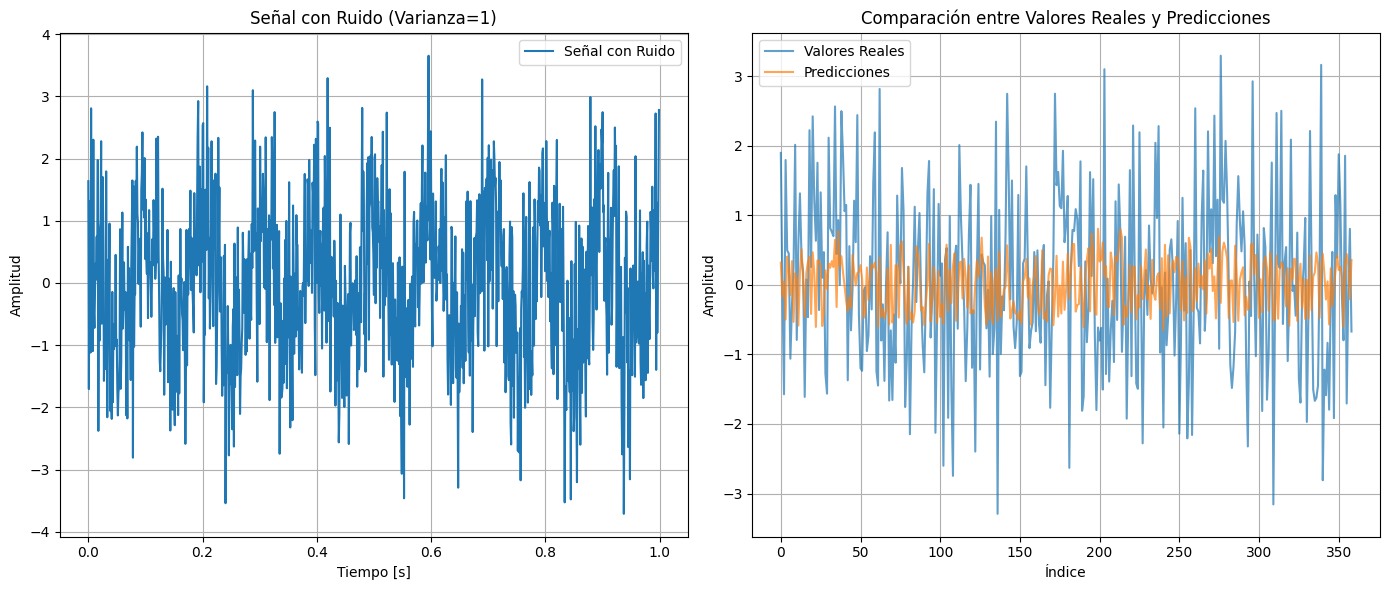

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Funciones definidas anteriormente
def generate_custom_signal(w, t):
    signal = np.cos(w * t) - (1/3) * np.sin(3 * w * t) + (1/5) * np.cos(5 * w * t)
    return signal

def add_gaussian_noise(signal, variance):
    noise = np.random.normal(loc=0.0, scale=np.sqrt(variance), size=signal.shape)
    noisy_signal = signal + noise
    return noisy_signal

# Parámetros
fs = 1024  # Frecuencia de muestreo (samples per second)
T = 1      # Duración en segundos
w = 2 * np.pi * 10  # Frecuencia angular (10 Hz)
t = np.linspace(0, T, fs, endpoint=False)  # Array de tiempo

# Generar la señal original
signal = generate_custom_signal(w, t)

# Seleccionar una varianza específica
variance = 1
noisy_signal = add_gaussian_noise(signal, variance)

# Crear los datos de entrada para el MLPRegressor
# Utilizaremos un enfoque simple: predecir el valor del siguiente punto
X = noisy_signal[:-1].reshape(-1, 1)  # Datos de entrada (valores actuales)
y = noisy_signal[1:]  # Etiquetas (valores siguientes)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Crear y entrenar el modelo MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Graficar resultados
plt.figure(figsize=(14, 6))

# Señal original y señal con ruido
plt.subplot(1, 2, 1)
plt.plot(t, noisy_signal, label='Señal con Ruido')
plt.title(f'Señal con Ruido (Varianza={variance})')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Comparación de las predicciones con las reales
plt.subplot(1, 2, 2)
plt.plot(y_test, label='Valores Reales', alpha=0.7)
plt.plot(y_pred, label='Predicciones', alpha=0.7)
plt.title('Comparación entre Valores Reales y Predicciones')
plt.xlabel('Índice')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Norma L2 de la diferencia entre los espectros: 0.04204372355737431


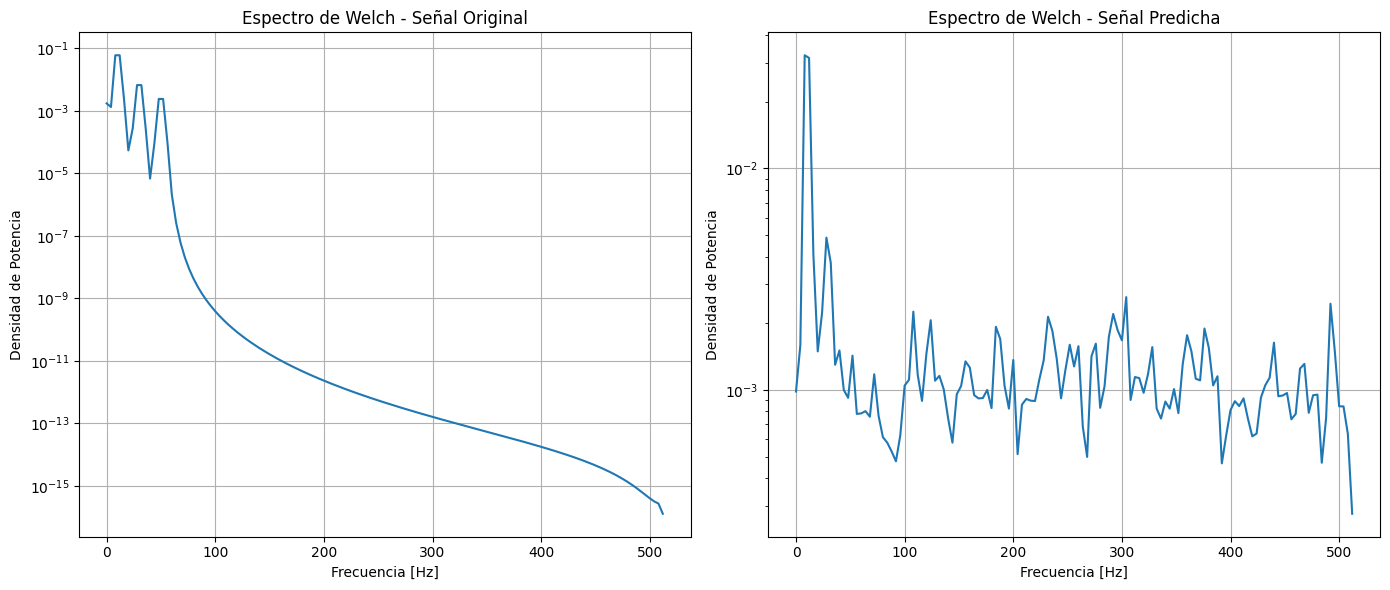

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Funciones definidas anteriormente
def generate_custom_signal(w, t):
    signal = np.cos(w * t) - (1/3) * np.sin(3 * w * t) + (1/5) * np.cos(5 * w * t)
    return signal

def add_gaussian_noise(signal, variance):
    noise = np.random.normal(loc=0.0, scale=np.sqrt(variance), size=signal.shape)
    noisy_signal = signal + noise
    return noisy_signal

# Parámetros
fs = 1024  # Frecuencia de muestreo (samples per second)
T = 1      # Duración en segundos
w = 2 * np.pi * 10  # Frecuencia angular (10 Hz)
t = np.linspace(0, T, fs, endpoint=False)  # Array de tiempo

# Generar la señal original
signal = generate_custom_signal(w, t)

# Seleccionar una varianza específica
variance = 1
noisy_signal = add_gaussian_noise(signal, variance)

# Crear los datos de entrada para el MLPRegressor
# Utilizaremos un enfoque simple: predecir el valor del siguiente punto
X = noisy_signal[:-1].reshape(-1, 1)  # Datos de entrada (valores actuales)
y = noisy_signal[1:]  # Etiquetas (valores siguientes)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Crear y entrenar el modelo MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Reconstruir la señal predicha para toda la duración usando los datos de entrada
reconstructed_signal = np.concatenate([noisy_signal[:len(X_train)], model.predict(X_train)])

# Calcular el espectro de Welch
def compute_welch_spectrum(signal, fs, nperseg=256):
    f, Pxx = welch(signal, fs, nperseg=nperseg)
    return f, Pxx

f_original, Pxx_original = compute_welch_spectrum(signal, fs)
f_predicted, Pxx_predicted = compute_welch_spectrum(reconstructed_signal, fs)

# Asegurarse de que ambos espectros tengan el mismo tamaño para comparar
min_len = min(len(Pxx_original), len(Pxx_predicted))
Pxx_original = Pxx_original[:min_len]
Pxx_predicted = Pxx_predicted[:min_len]
f_original = f_original[:min_len]
f_predicted = f_predicted[:min_len]

# Comparar los espectros mediante la resta en L2
l2_norm = np.linalg.norm(Pxx_original - Pxx_predicted)
print(f"Norma L2 de la diferencia entre los espectros: {l2_norm}")

# Graficar los espectros
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.semilogy(f_original, Pxx_original, label='Espectro Original')
plt.title('Espectro de Welch - Señal Original')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad de Potencia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogy(f_predicted, Pxx_predicted, label='Espectro Predicho')
plt.title('Espectro de Welch - Señal Predicha')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad de Potencia')
plt.grid(True)

plt.tight_layout()
plt.show()


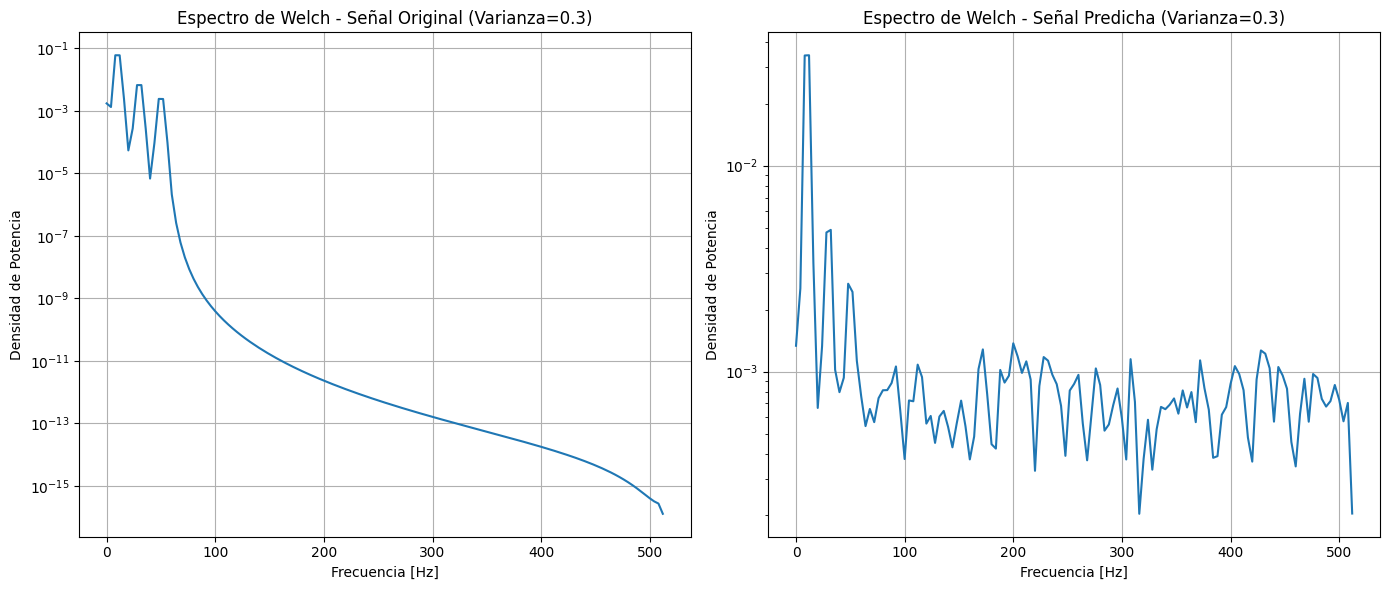

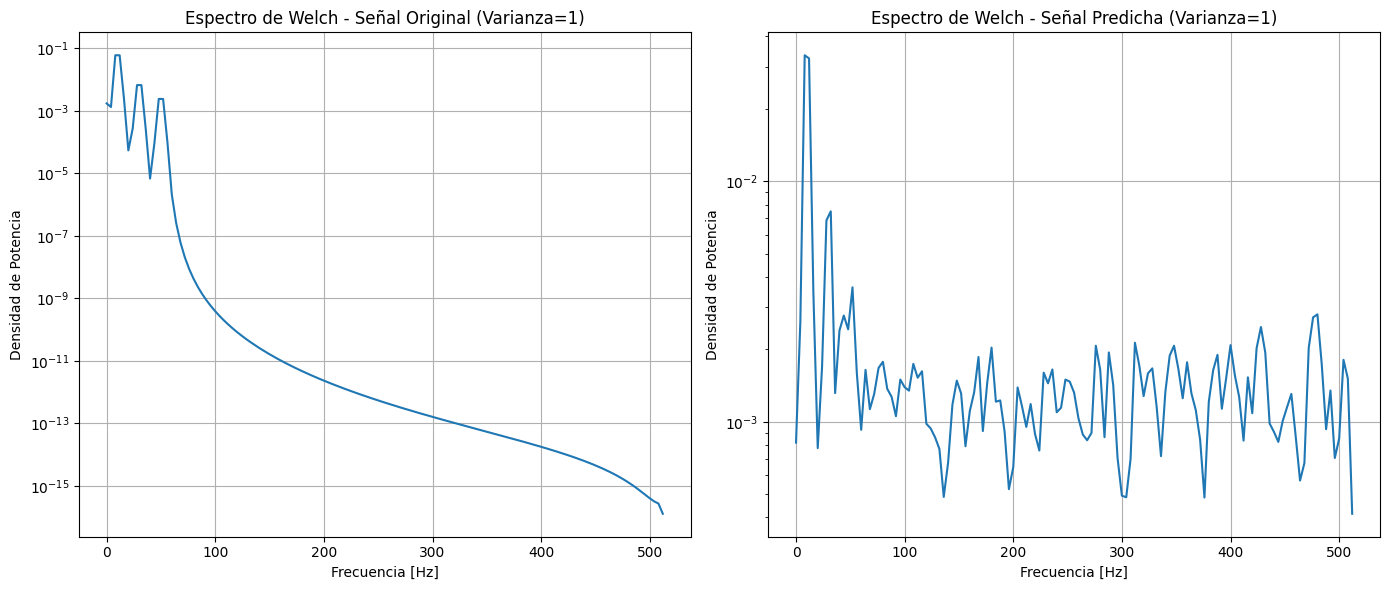

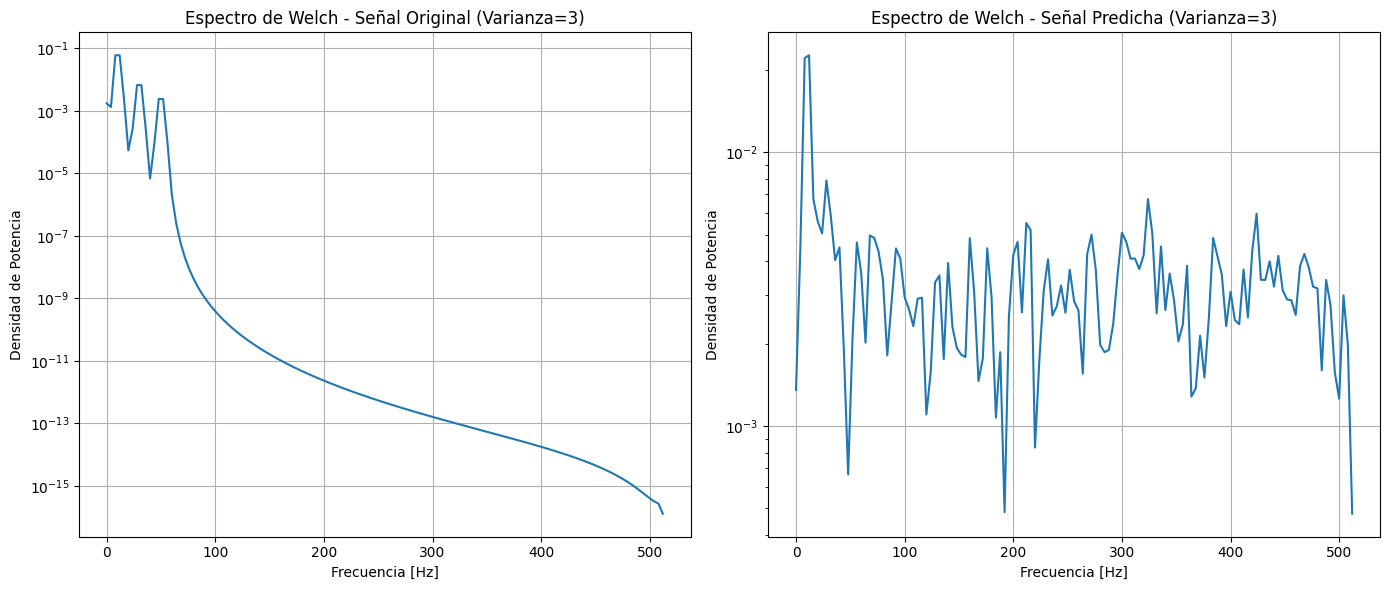

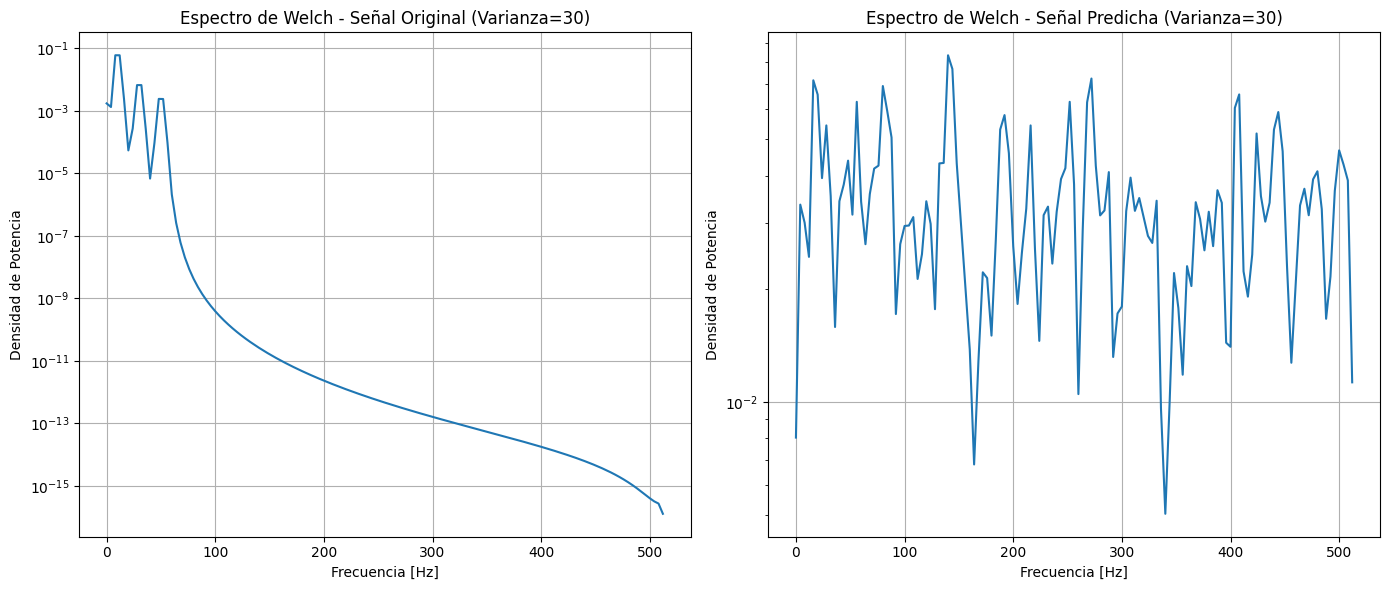

Comparación de la Norma L2 entre los espectros de Welch:
Varianza = 0.3, Norma L2 = 0.037508423017643254
Varianza = 1, Norma L2 = 0.04139989203375321
Varianza = 3, Norma L2 = 0.06514475026784998
Varianza = 30, Norma L2 = 0.4183779598523007


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, welch
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Funciones definidas anteriormente
def generate_custom_signal(w, t):
    signal = np.cos(w * t) - (1/3) * np.sin(3 * w * t) + (1/5) * np.cos(5 * w * t)
    return signal

def add_gaussian_noise(signal, variance):
    noise = np.random.normal(loc=0.0, scale=np.sqrt(variance), size=signal.shape)
    noisy_signal = signal + noise
    return noisy_signal

# Parámetros
fs = 1024  # Frecuencia de muestreo (samples per second)
T = 1      # Duración en segundos
w = 2 * np.pi * 10  # Frecuencia angular (10 Hz)
t = np.linspace(0, T, fs, endpoint=False)  # Array de tiempo

# Generar la señal original
signal = generate_custom_signal(w, t)

# Varianzas de ruido para diferentes señales
variances = [0.3, 1, 3, 30]

# Preparar almacenamiento para resultados
results = []

for variance in variances:
    # Generar la señal ruidosa
    noisy_signal = add_gaussian_noise(signal, variance)

    # Crear los datos de entrada para el MLPRegressor
    X = noisy_signal[:-1].reshape(-1, 1)  # Datos de entrada (valores actuales)
    y = noisy_signal[1:]  # Etiquetas (valores siguientes)

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

    # Crear y entrenar el modelo MLPRegressor
    model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = model.predict(X_test)

    # Reconstruir la señal predicha
    reconstructed_signal = np.concatenate([noisy_signal[:len(X_train)], model.predict(X_train)])

    # Calcular el espectro de Welch
    def compute_welch_spectrum(signal, fs, nperseg=256):
        f, Pxx = welch(signal, fs, nperseg=nperseg)
        return f, Pxx

    f_original, Pxx_original = compute_welch_spectrum(signal, fs)
    f_predicted, Pxx_predicted = compute_welch_spectrum(reconstructed_signal, fs)

    # Asegurarse de que ambos espectros tengan el mismo tamaño para comparar
    min_len = min(len(Pxx_original), len(Pxx_predicted))
    Pxx_original = Pxx_original[:min_len]
    Pxx_predicted = Pxx_predicted[:min_len]
    f_original = f_original[:min_len]
    f_predicted = f_predicted[:min_len]

    # Comparar los espectros mediante la resta en L2
    l2_norm = np.linalg.norm(Pxx_original - Pxx_predicted)
    results.append((variance, l2_norm))

    # Graficar los espectros
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.semilogy(f_original, Pxx_original, label='Espectro Original')
    plt.title(f'Espectro de Welch - Señal Original (Varianza={variance})')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Densidad de Potencia')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.semilogy(f_predicted, Pxx_predicted, label='Espectro Predicho')
    plt.title(f'Espectro de Welch - Señal Predicha (Varianza={variance})')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Densidad de Potencia')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Mostrar los resultados
print("Comparación de la Norma L2 entre los espectros de Welch:")
for variance, l2_norm in results:
    print(f"Varianza = {variance}, Norma L2 = {l2_norm}")


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, welch
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Funciones definidas anteriormente
def generate_custom_signal(w, t):
    signal = np.cos(w * t) - (1/3) * np.sin(3 * w * t) + (1/5) * np.cos(5 * w * t)
    return signal

def add_gaussian_noise(signal, variance):
    noise = np.random.normal(loc=0.0, scale=np.sqrt(variance), size=signal.shape)
    noisy_signal = signal + noise
    return noisy_signal

def compute_welch_spectrum(signal, fs, nperseg=256):
    f, Pxx = welch(signal, fs, nperseg=nperseg)
    return f, Pxx

# Parámetros
fs = 1024  # Frecuencia de muestreo (samples per second)
T = 1      # Duración en segundos
w = 2 * np.pi * 10  # Frecuencia angular (10 Hz)
t = np.linspace(0, T, fs, endpoint=False)  # Array de tiempo

# Generar la señal original
signal = generate_custom_signal(w, t)

# Varianzas de ruido para diferentes señales
variances = [0.3, 1, 3, 30]

# Preparar almacenamiento para resultados
results = []

# Solicitar parámetros del usuario
hidden_layer_sizes = tuple(map(int, input("Ingrese el tamaño de las capas ocultas (separadas por comas): ").split(',')))
max_iter = int(input("Ingrese el número máximo de iteraciones: "))
test_size = float(input("Ingrese el tamaño del conjunto de prueba (como fracción): "))

for variance in variances:
    # Generar la señal ruidosa
    noisy_signal = add_gaussian_noise(signal, variance)

    # Crear los datos de entrada para el MLPRegressor
    X = noisy_signal[:-1].reshape(-1, 1)  # Datos de entrada (valores actuales)
    y = noisy_signal[1:]  # Etiquetas (valores siguientes)

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Crear y entrenar el modelo MLPRegressor
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=42)
    model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = model.predict(X_test)

    # Reconstruir la señal predicha
    reconstructed_signal = np.concatenate([noisy_signal[:len(X_train)], model.predict(X_train)])

    f_original, Pxx_original = compute_welch_spectrum(signal, fs)
    f_predicted, Pxx_predicted = compute_welch_spectrum(reconstructed_signal, fs)

    # Asegurarse de que ambos espectros tengan el mismo tamaño para comparar
    min_len = min(len(Pxx_original), len(Pxx_predicted)
    Pxx_original = Pxx_original[:min_len]
    Pxx_predicted = Pxx_predicted[:min_len]
    f_original = f_original[:min_len]
    f_predicted = f_predicted[:min_len]

    # Comparar los espectros mediante la resta en L2
    l2_norm = np.linalg.norm(Pxx_original - Pxx_predicted)
    results.append((variance, l2_norm))

    # Graficar los espectros
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.semilogy(f_original, Pxx_original, label='Espectro Original')
    plt.title(f'Espectro de Welch - Señal Original (Varianza={variance})')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Densidad de Potencia')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.semilogy(f_predicted, Pxx_predicted, label='Espectro Predicho')
    plt.title(f'Espectro de Welch - Señal Predicha (Varianza={variance})')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Densidad de Potencia')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Mostrar los resultados
print("Comparación de la Norma L2 entre los espectros de Welch:")
for variance, l2_norm in results:
    print(f"Varianza = {variance}, Norma L2 = {l2_norm}")